# WordCloud Creation

## Imports and Global Settings

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import plot, plot_correlation, plot_missing
from bs4 import BeautifulSoup
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)
sns.set(font='sans-serif')

NumExpr defaulting to 4 threads.


## Load Data

In [2]:
data = pd.read_json('../data/model_data_v1.json', orient='records', lines=True)
text_columns = ["description", "name", "org_desc", "org_name"]
features_target = text_columns + ["is_fraud"]
df_text = data.loc[:, features_target].copy()

## Convert Html to Normal Text String

In [3]:
df_text['desc_soup'] = df_text['description'].apply(lambda x: BeautifulSoup(x, 'html.parser'))
df_text['desc_clean'] = df_text['desc_soup'].apply(lambda x: x.get_text("|", strip=True))

/home/jeff/anaconda3/lib/python3.7/site-packages/bs4/__init__.py:424: MarkupResemblesLocatorWarning: "http://www.harvestbiblefellowship.org/verticalchurchdavenport" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  MarkupResemblesLocatorWarning


In [4]:
df_fraud = df_text[df_text.is_fraud == "Fraud"]
df_not_fraud = df_text[df_text.is_fraud == "Not Fraud"]

In [5]:
fraud_text_desc = " ".join(review for review in df_fraud.desc_clean)
fraud_text_name = " ".join(review for review in df_fraud.name)
non_fraud_text_desc = " ".join(review for review in df_not_fraud.desc_clean)
non_fraud_text_name = " ".join(review for review in df_not_fraud.name)

## Set Up Stopwords

In [6]:
stopwords = set(STOPWORDS)
stopwords.update(["Unknown", "January", "February", "March",
                  "April", "May", "June", "July", "August",
                  "September", "October", "November", "December",
                  "PM", "AM", "Friday", "Saturday", "br", "W", "2nd",
                  "3rd", "30pm", "St", "E", "1st", "U", "s", "day",
                  "will", "le", "de", "ticket", "event", "one",
                  "night", "new", "tickets", "us", 'la', "et",
                  "les", "des", "time", "à", "du"])

## Event Description

#### Make Wordclouds

In [7]:
non_fraud_wordcloud_desc = WordCloud(stopwords=stopwords, background_color="cornflowerblue", colormap="Set1",
                      collocations=False, color_func=lambda *args, **kwargs: "black",
                      width=1000, height=1000).generate(non_fraud_text_desc)

In [8]:
fraud_wordcloud_desc = WordCloud(stopwords=stopwords, background_color="lightcoral", colormap="Set1",
                      collocations=False, color_func=lambda *args, **kwargs: "black",
                      width=1000, height=1000).generate(fraud_text_desc)

#### Show and Save Wordclouds

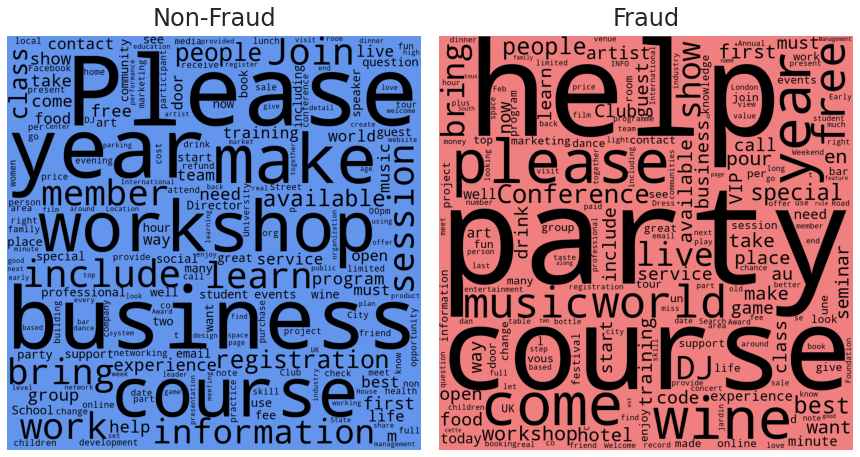

In [9]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.imshow(non_fraud_wordcloud_desc)
ax1.axis("off")
ax1.set_title("Non-Fraud", fontsize=24, pad=10)


ax2.imshow(fraud_wordcloud_desc)
ax2.axis("off")
ax2.set_title("Fraud", fontsize=24, pad=10)

fig.tight_layout(pad=0)

plt.savefig('../images/description_wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()

## Event Name

#### Make Wordclouds

In [10]:
non_fraud_wordcloud_name = WordCloud(stopwords=stopwords, background_color="cornflowerblue", colormap="Set1",
                      collocations=False, color_func=lambda *args, **kwargs: "black",
                      width=1000, height=1000).generate(non_fraud_text_name)

In [11]:
fraud_wordcloud_name = WordCloud(stopwords=stopwords, background_color="lightcoral", colormap="Set1",
                      collocations=False, color_func=lambda *args, **kwargs: "black",
                      width=1000, height=1000).generate(fraud_text_name)

#### Show and Save Wordclouds

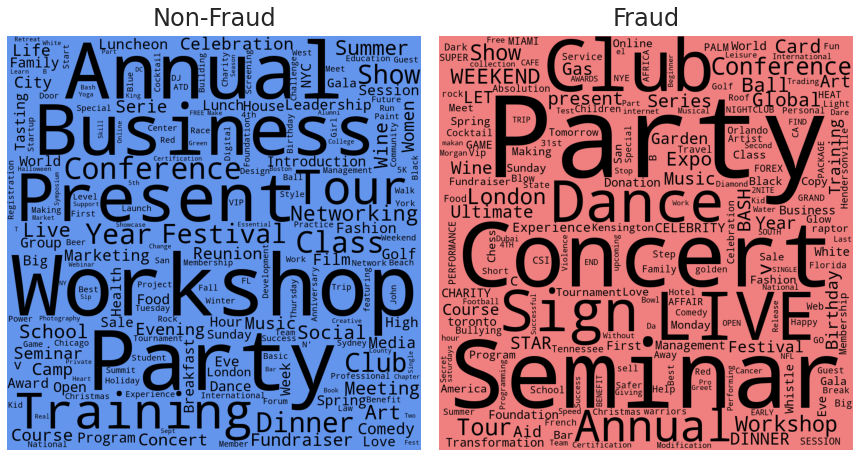

In [12]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))


ax1.imshow(non_fraud_wordcloud_name)
ax1.axis("off")
ax1.set_title("Non-Fraud", fontsize=24, pad=10)


ax2.imshow(fraud_wordcloud_name)
ax2.axis("off")
ax2.set_title("Fraud", fontsize=24, pad=10)

fig.tight_layout(pad=0)

plt.savefig('../images/name_wordclouds.png', dpi=300, bbox_inches='tight')
plt.show()